# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'.

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [ ]:
# 0)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('demo02.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16650 entries, 0 to 16649
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   qtd_filhos                              16650 non-null  int64  
 1   idade                                   16650 non-null  float64
 2   tempo_emprego                           16650 non-null  float64
 3   possui_celular                          16650 non-null  int64  
 4   possui_fone_comercial                   16650 non-null  int64  
 5   possui_fone                             16650 non-null  int64  
 6   possui_email                            16650 non-null  int64  
 7   qt_pessoas_residencia                   16650 non-null  float64
 8   mau                                     16650 non-null  int64  
 9   sexo_M                                  16650 non-null  bool   
 10  posse_de_veiculo_Y                      16650 non-null  bo

In [ ]:
X = df.drop('mau', axis=1)
y = df['mau']


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [ ]:
#2.1)
clf = DecisionTreeClassifier(random_state=100)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=100)

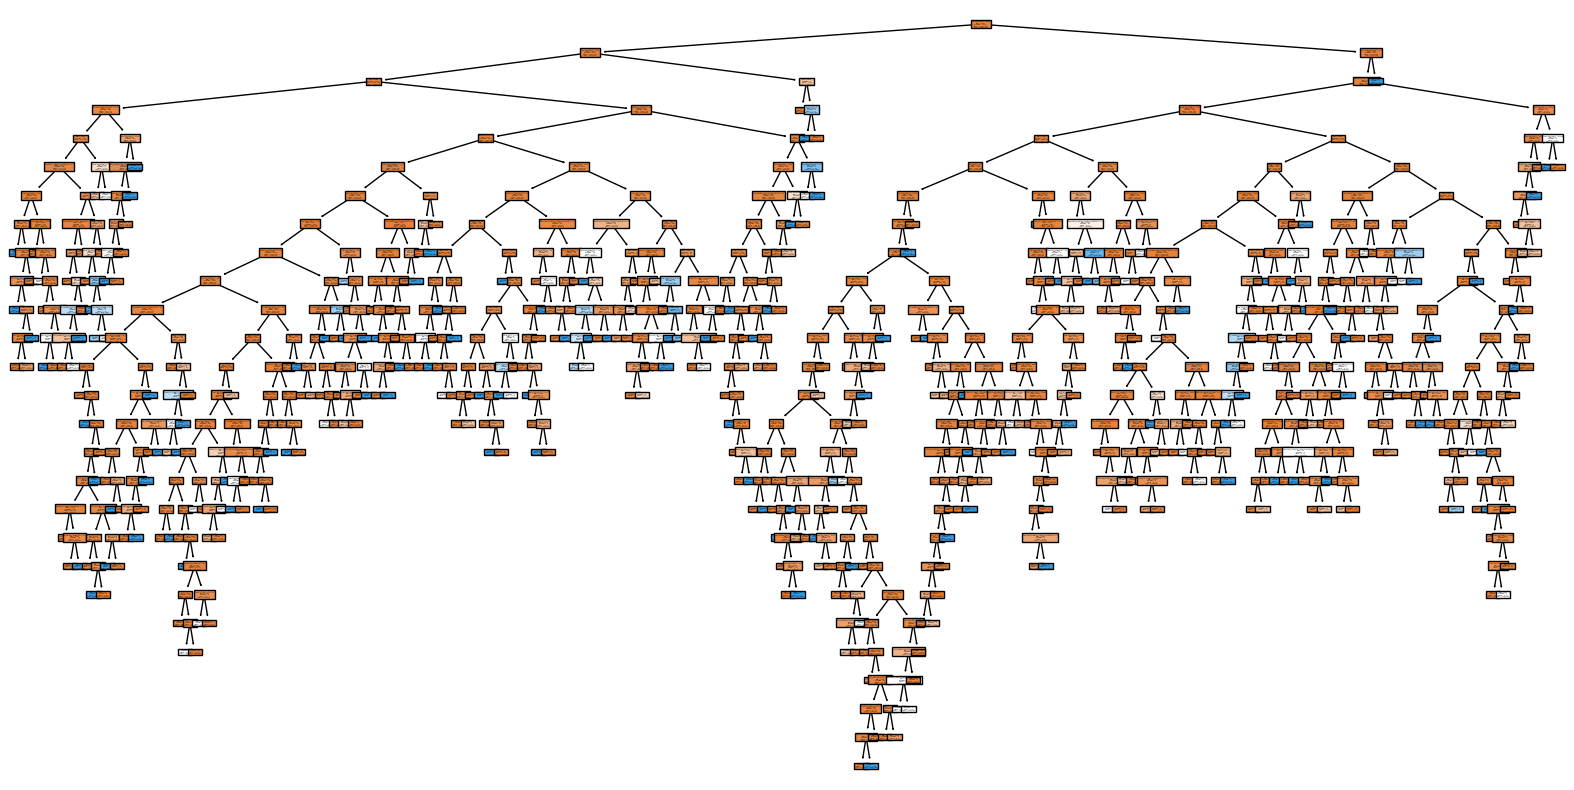

In [ ]:
# 2.2 e 2.3)
y_train_pred = clf.predict(X_train)

plt.figure(figsize=(20, 10))
plot_tree(clf,
          filled=True,
          class_names=['aprovados', 'reprovados'],
          feature_names=X.columns)
plt.show()

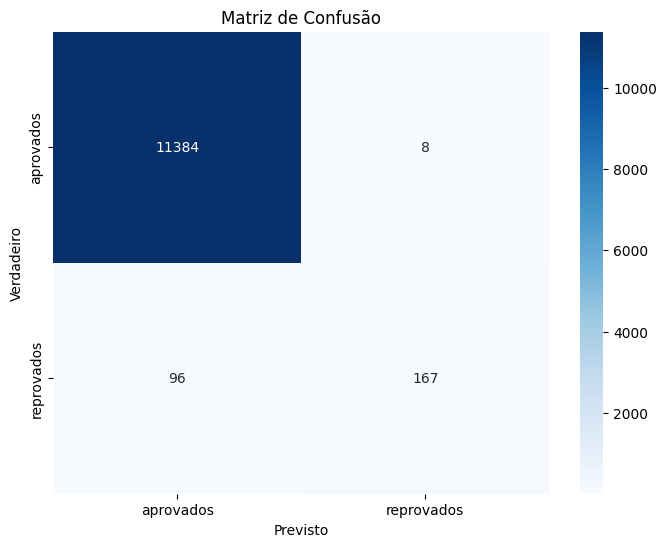

In [ ]:
cm = confusion_matrix(y_train, y_train_pred, labels=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['aprovados', 'reprovados'], yticklabels=['aprovados', 'reprovados'])
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()

In [ ]:
acuracia = accuracy_score(y_train, y_train_pred)
print(f'Acurácia na base de treinamento: {acuracia:.2f}')

Acurácia na base de treinamento: 0.99


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

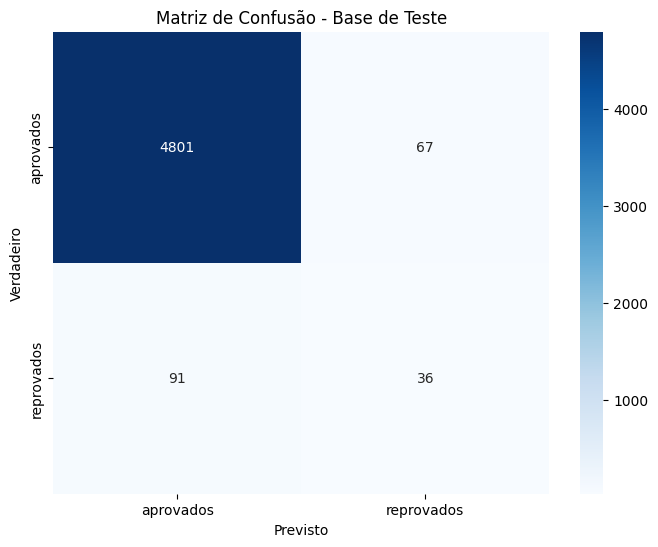

Acurácia na base de teste: 0.97
Acurácia na base de treinamento: 0.99


In [ ]:
# 3.1) Previsão
y_val_pred = clf.predict(X_val)

# 3.2) Confusão
cm_val = confusion_matrix(y_val, y_val_pred, labels=[0, 1])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues', xticklabels=['aprovados', 'reprovados'], yticklabels=['aprovados', 'reprovados'])
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão - Base de Teste')
plt.show()

# 3.3) Acuracia base de testes
acuracia_val = accuracy_score(y_val, y_val_pred)
print(f'Acurácia na base de teste: {acuracia_val:.2f}')

# Acuracia treinamento:
acuracia_train = accuracy_score(y_train, clf.predict(X_train))
print(f'Acurácia na base de treinamento: {acuracia_train:.2f}')

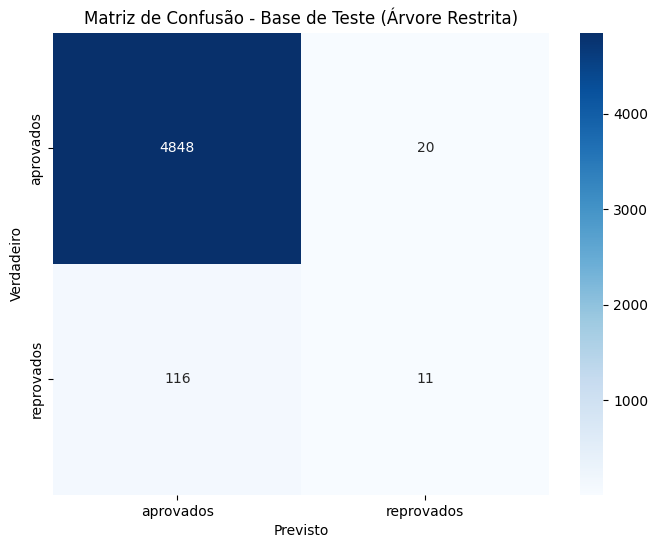

Acurácia na base de teste (Árvore Restrita): 0.97


In [ ]:
# 3.4.1) Mínimo de observações por folha: 5 // máximo de profundidade: 10
clf_restrito = DecisionTreeClassifier(random_state=123, min_samples_leaf=5, max_depth=10)
clf_restrito.fit(X_train, y_train)

y_val_pred_restrito = clf_restrito.predict(X_val)

# Calcular a matriz de confusão para a nova árvore na base de teste
cm_val_restrito = confusion_matrix(y_val, y_val_pred_restrito, labels=[0, 1])

# Matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm_val_restrito, annot=True, fmt='d', cmap='Blues', xticklabels=['aprovados', 'reprovados'], yticklabels=['aprovados', 'reprovados'])
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão - Base de Teste (Árvore Restrita)')
plt.show()

# Nova acuracia
acuracia_val_restrito = accuracy_score(y_val, y_val_pred_restrito)
print(f'Acurácia na base de teste (Árvore Restrita): {acuracia_val_restrito:.2f}')

In [ ]:
# 3.4.2) Proporção de maus
proporcao_maus = sum(y_val_pred_restrito) / len(y_val_pred_restrito)
print(f'Proporção de proponentes classificados como "maus": {proporcao_maus:.2f}')

Proporção de proponentes classificados como "maus": 0.01


In [ ]:
# 3.5) Proporção de bons
acuracia_bons = accuracy_score(y_val, [0] * len(y_val))
print(f'Acurácia se todos os contratos forem classificados como "bons": {acuracia_bons:.2f}')

Acurácia se todos os contratos forem classificados como "bons": 0.97
